In [1]:
import numpy as np
import math #mathを使うため
import matplotlib.pyplot as plt
import sympy as sym #微分に使う
from sympy.plotting import plot #図示に使う

np.set_printoptions(precision=8, floatmode="fixed") #小数点３桁表示

In [2]:
# 2次関数の定義
def func(x):
    return x**2 + 3*x + 37

# func(x)の導関数と導関数の絶対値
def dfunc(x):
    df = 2*x + 3
    df_abs = np.abs(df)
    return df, df_abs

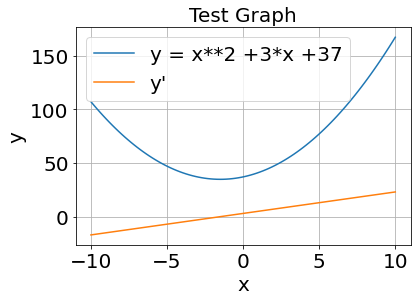

In [3]:
#ちなみにこんなグラフ
x,y=sym.symbols("x y")
x = np.linspace(-10,10,100)
y = x**2 +3*x +37
dy = 2*x +3

"""
plt.plot(x, y, 'o') 
plt.xlabel("x") #横軸のラベル名
plt.ylabel("y") #縦軸のラベル名
plt.xlim(-10,10)
plt.ylim(-30,130)
plt.show()
"""


plt.plot(x, y, label="y = x**2 +3*x +37")
plt.plot(x, dy, label="y'")

plt.title("Test Graph", {"fontsize": 20})
plt.xlabel("x", {"fontsize": 20})
plt.ylabel("y", {"fontsize": 20})
plt.tick_params(labelsize=20)
plt.legend(prop={"size": 20}, loc="best")
plt.grid()

plt.show()

最小値をとるxと勾配の大きさ
[-1.49950413e+00  9.91745312e-04]


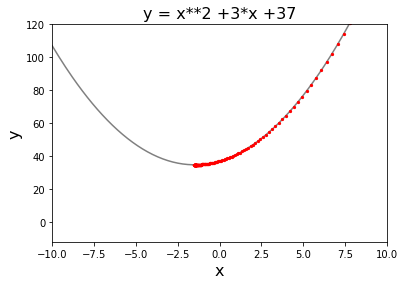

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Axesのタイトルを設定
ax.set_title("y = x**2 +3*x +37", fontsize = 16)

# 軸ラベルと軸範囲を設定
ax.set_xlabel("x", fontsize = 16)
ax.set_ylabel("y", fontsize = 16)
ax.set_xlim([-10, 10])
ax.set_ylim([-12, 120])

# -10～10まで0.1刻みの数値の配列 = dx = λ
x = np.arange(-10, 10, 0.1)

ax.plot(x, func(x), color = "gray", zorder = 1)



# ★★★ 最急降下法による最小値の探索 ★★★

# xの初期値
x = 9

# 学習率α
alpha = 0.02

# 収束判定条件
eps = 0.001

# 繰返しの最大数
k_max = 1000

for k in range(1, k_max):
    x -= alpha * dfunc(x)[0]

    # (x, f(x))を散布図にプロット
    # マーカーサイズs=5,描画優先順位：zorder=2
    ax.scatter(x, func(x), s = 5, color = "red", zorder = 2)

    # 勾配の絶対値がeps以下になったらループ終了
    if dfunc(x)[1] < eps:
        break

# 最小値をとるxと勾配の大きさ
print("最小値をとるxと勾配の大きさ")
result = np.array([x, dfunc(x)[1]])
print(result)

極小値２つ以上の時

In [5]:
# 関数の定義
def func(x):
    return x * np.cos(2*x)  + 3*x + 37


# 導関数
def dfunc(x):
    df = np.cos(2*x) - 2*x*np.sin(2*x)  + 3
    df_abs = np.abs(df)
    return df, df_abs

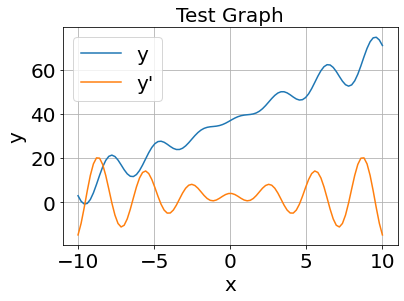

In [6]:
#ちなみにこんなグラフ
x,y=sym.symbols("x y")
x = np.linspace(-10,10,100)
y = x * np.cos(2*x) +  3*x + 37
dy = np.cos(2*x) - 2*x*np.sin(2*x)  + 3

plt.plot(x, y, label="y")
plt.plot(x, dy, label="y'")

plt.title("Test Graph", {"fontsize": 20})
plt.xlabel("x", {"fontsize": 20})
plt.ylabel("y", {"fontsize": 20})
plt.tick_params(labelsize=20)
plt.legend(prop={"size": 20}, loc="best")
plt.grid()

plt.show()

[-3.43703741 23.83461566]
[-3.43703947 23.83461565]
[-3.43703866 23.83461566]
[ 4.60143923 46.31570040]
[ 4.60154020 46.31570040]


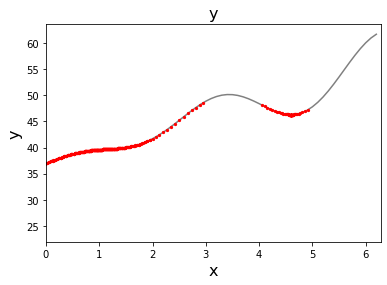

In [7]:
# ★★★ グラフの描画 ★★★

# Figureを作成してAxesを１つ追加
fig = plt.figure()
ax = fig.add_subplot(111)

# Axesのタイトルを設定
ax.set_title("y", fontsize = 16)

# 軸ラベルと軸範囲を設定
ax.set_xlabel("x", fontsize = 16)
ax.set_ylabel("y", fontsize = 16)
ax.set_xlim([0, 2*np.pi])

# 0～2piまで0.1刻みの数値の配列を定義
x = np.arange(0, 2*np.pi, 0.1)

# Axesにグラフをプロット
# 描画優先順位：zorder=2
ax.plot(x, func(x), color = "gray", zorder = 1)

# ★★★ 最急降下法による最小値の探索 ★★★

# 学習率α
alpha = 0.01

# 収束判定条件
eps = 0.001

# 繰返しの最大数
k_max = 1000

# 初期値=1,2,3,4,5
for j in range(1, 6):
    x = j

    for k in range(1, k_max):
        x -= alpha * dfunc(x)[0]

        # (x, f(x))を散布図にプロット
        # マーカーサイズ：s=5,描画優先順位：zorder=2
        ax.scatter(x, func(x), s = 5, color = "red", zorder = 2)

        # 勾配の絶対値がeps以下になったらループ終了
        if dfunc(x)[1] < eps:
            break

    # x,f(x)の値を表示
    print(np.array([x, func(x)]))

二変数関数

[-0.00044436 -0.00022218]


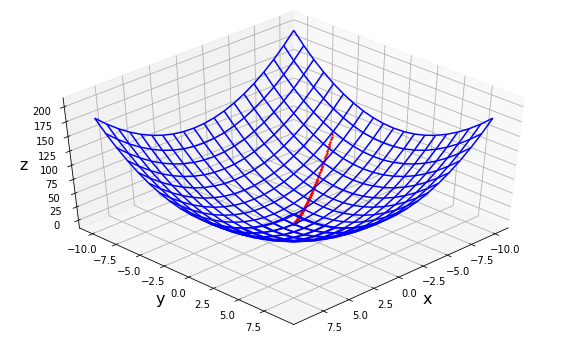

In [8]:
# 関数の定義
def func(x ,y):
    return x**2 + y**2

# 勾配と勾配の大きさ(ノルム)
def grad(x, y):
    gf = np.array([2*x, 2*y])
    gf_norm = np.linalg.norm(gf)
    return gf, gf_norm

# Figureを追加
fig = plt.figure(figsize = (10, 6))

# 3DAxeSを追加
ax = fig.add_subplot(111, projection="3d")

# 軸ラベルを設定
ax.set_xlabel("x", size = 16)
ax.set_ylabel("y", size = 16)
ax.set_zlabel("z", size = 16)

# 格子点の作成
X, Y = np.mgrid[-10:10, -10:10]

# 高度の計算式
Z = func(X, Y)

# ワイヤーフレームを描画
ax.plot_wireframe(X, Y, Z, color = "blue", zorder = 1)

# 視点の設定
ax.view_init(45, 45)

# ★★★ 最急降下法による最小値の探索 ★★★

# 初期値の設定
x, y = (-8, -4)

# 学習率α
alpha = 0.01

# 収束判定条件
eps = 0.001

# 繰返しの最大数
k_max = 10000

for k in range(1, k_max):
    x -= alpha * grad(x, y)[0][0]
    y -= alpha * grad(x, y)[0][1]

    # (x, f(x))を散布図にプロット
    ax.scatter(x, y, func(x, y), s = 2, color = "red", zorder = 2)
    
    # 勾配の大きさがeps以下になったらループ終了
    if grad(x, y)[1] < eps:
        break

# 最小値をとるx,yを表示
print(np.array([x, y]))